In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [9]:
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


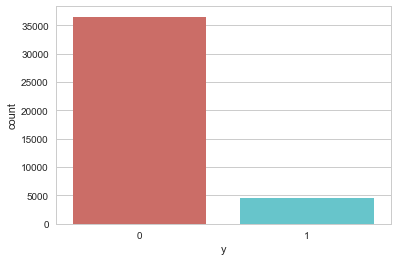

In [10]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

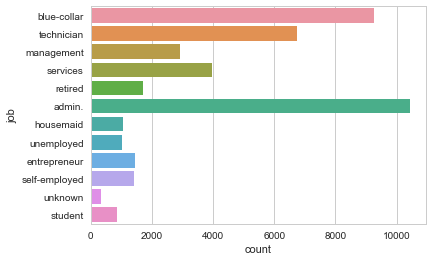

In [12]:
sns.countplot(y="job", data=data)
plt.show()

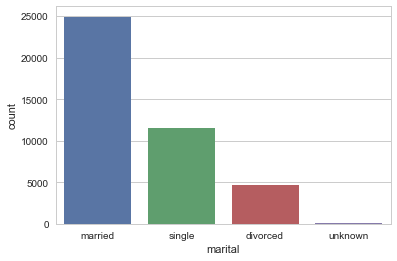

In [13]:
sns.countplot(x="marital", data=data)
plt.show()

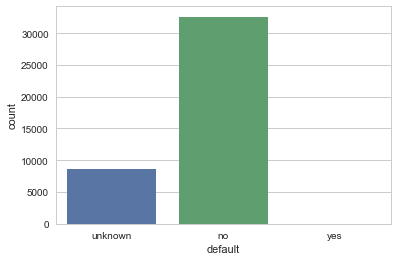

In [14]:
sns.countplot(x="default", data=data)
plt.show()

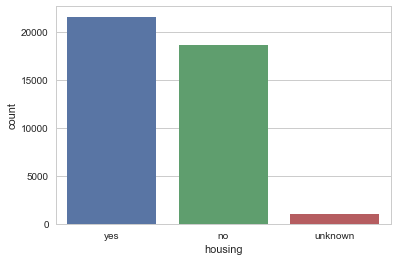

In [15]:
sns.countplot(x="housing", data=data)
plt.show()

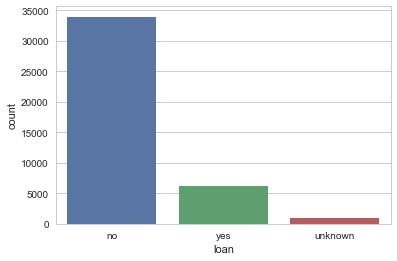

In [16]:
sns.countplot(x="loan", data=data)
plt.show()

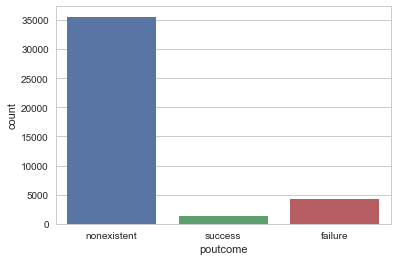

In [17]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [18]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [19]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [20]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

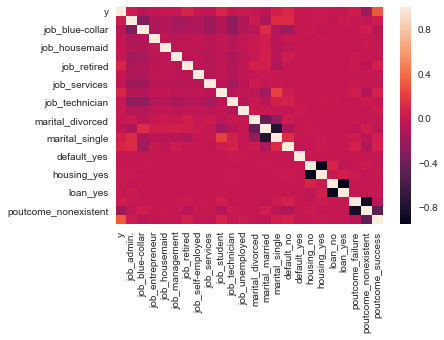

In [21]:
sns.heatmap(data2.corr())
plt.show()

In [22]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
X_train.shape

(30891, 23)

In [24]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


In [26]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9156
          1       0.68      0.20      0.31      1141

avg / total       0.88      0.90      0.88     10297



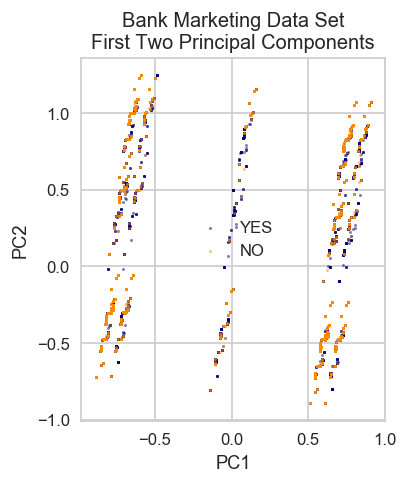

In [28]:
from sklearn.decomposition import PCA
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()